# Datenvorbereitung für die Lineare und die Support Vector Regression

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Einlesen der Daten

In [2]:
studierende = pd.read_csv("studierende_portugiesisch.csv", sep = ";")

## Ändern aller nominalen Attribute, wie z.B. die Angabe der Schule in numerische

### Funktion zum ändern der  'yes' und 'no' Werte in 0 und 1
<font size = 3>Da es bei mehreren Attributen vorkommt, dass diese binär aber nominal angegeben sind, wird zur Vereinfachung eine Funktion zur Umwandlung in numerische Wert geschrieben.

In [3]:
def yes_no(value):
    
    if value == 'yes':
        value = 1
    elif value =='no':
        value = 0
        
    return value

In [4]:
def nom_to_num(studierende):
    
    df_studierende = studierende.drop(columns = ['G1', 'G2'])
    
    # schule binär
    df_studierende.school.replace(('GP', 'MS'), (0,1), inplace=True)
    
    # sex binär
    df_studierende.sex.replace(('F', 'M'), (0,1), inplace=True)

    # adress binär
    df_studierende.address.replace(('U', 'R'), (0,1), inplace=True)

    # family size binär
    df_studierende.famsize.replace(('LE3','GT3'), (0,1), inplace=True)

    # Pstatus binär
    df_studierende.Pstatus.replace(('T', 'A'), (0,1), inplace=True)

    # Mjob 1 bis 5
    df_studierende.Mjob.replace(('teacher','health', 'services', 'at_home', 'other' ), (0,1,2,3,4), inplace=True)

    # Fjob 1 bis 5
    df_studierende.Fjob.replace(('teacher','health', 'services', 'at_home', 'other' ), (0,1,2,3,4), inplace=True)

    # reason 1 bis 4
    df_studierende.reason.replace(('home', 'reputation','course', 'other'), (0,1,2,3), inplace=True)

    # guardian 1 bis 3
    df_studierende.guardian.replace(('mother', 'father', 'other'), (0,1,2), inplace=True)

    # eventuell über spaltennamen iterieren    
    # schoolsup binär
    df_studierende['schoolsup'] = df_studierende['schoolsup'].apply(yes_no)
    
    # famsup binär
    df_studierende['famsup'] = df_studierende['famsup'].apply(yes_no)

    # paid binär
    df_studierende['paid'] = df_studierende['paid'].apply(yes_no)

    # activities binär
    df_studierende['activities'] = df_studierende['activities'].apply(yes_no)

    # nursery binär
    df_studierende['nursery'] = df_studierende['nursery'].apply(yes_no)

    # higher  binär
    df_studierende['higher'] = df_studierende['higher'].apply(yes_no)

    # internet binär
    df_studierende['internet'] = df_studierende['internet'].apply(yes_no)

    # romantic binär
    df_studierende['romantic'] = df_studierende['romantic'].apply(yes_no)

    return df_studierende

df_studierende = nom_to_num(studierende)

### Korrelation der Attribute zur Zielvariablen veranschaulichen

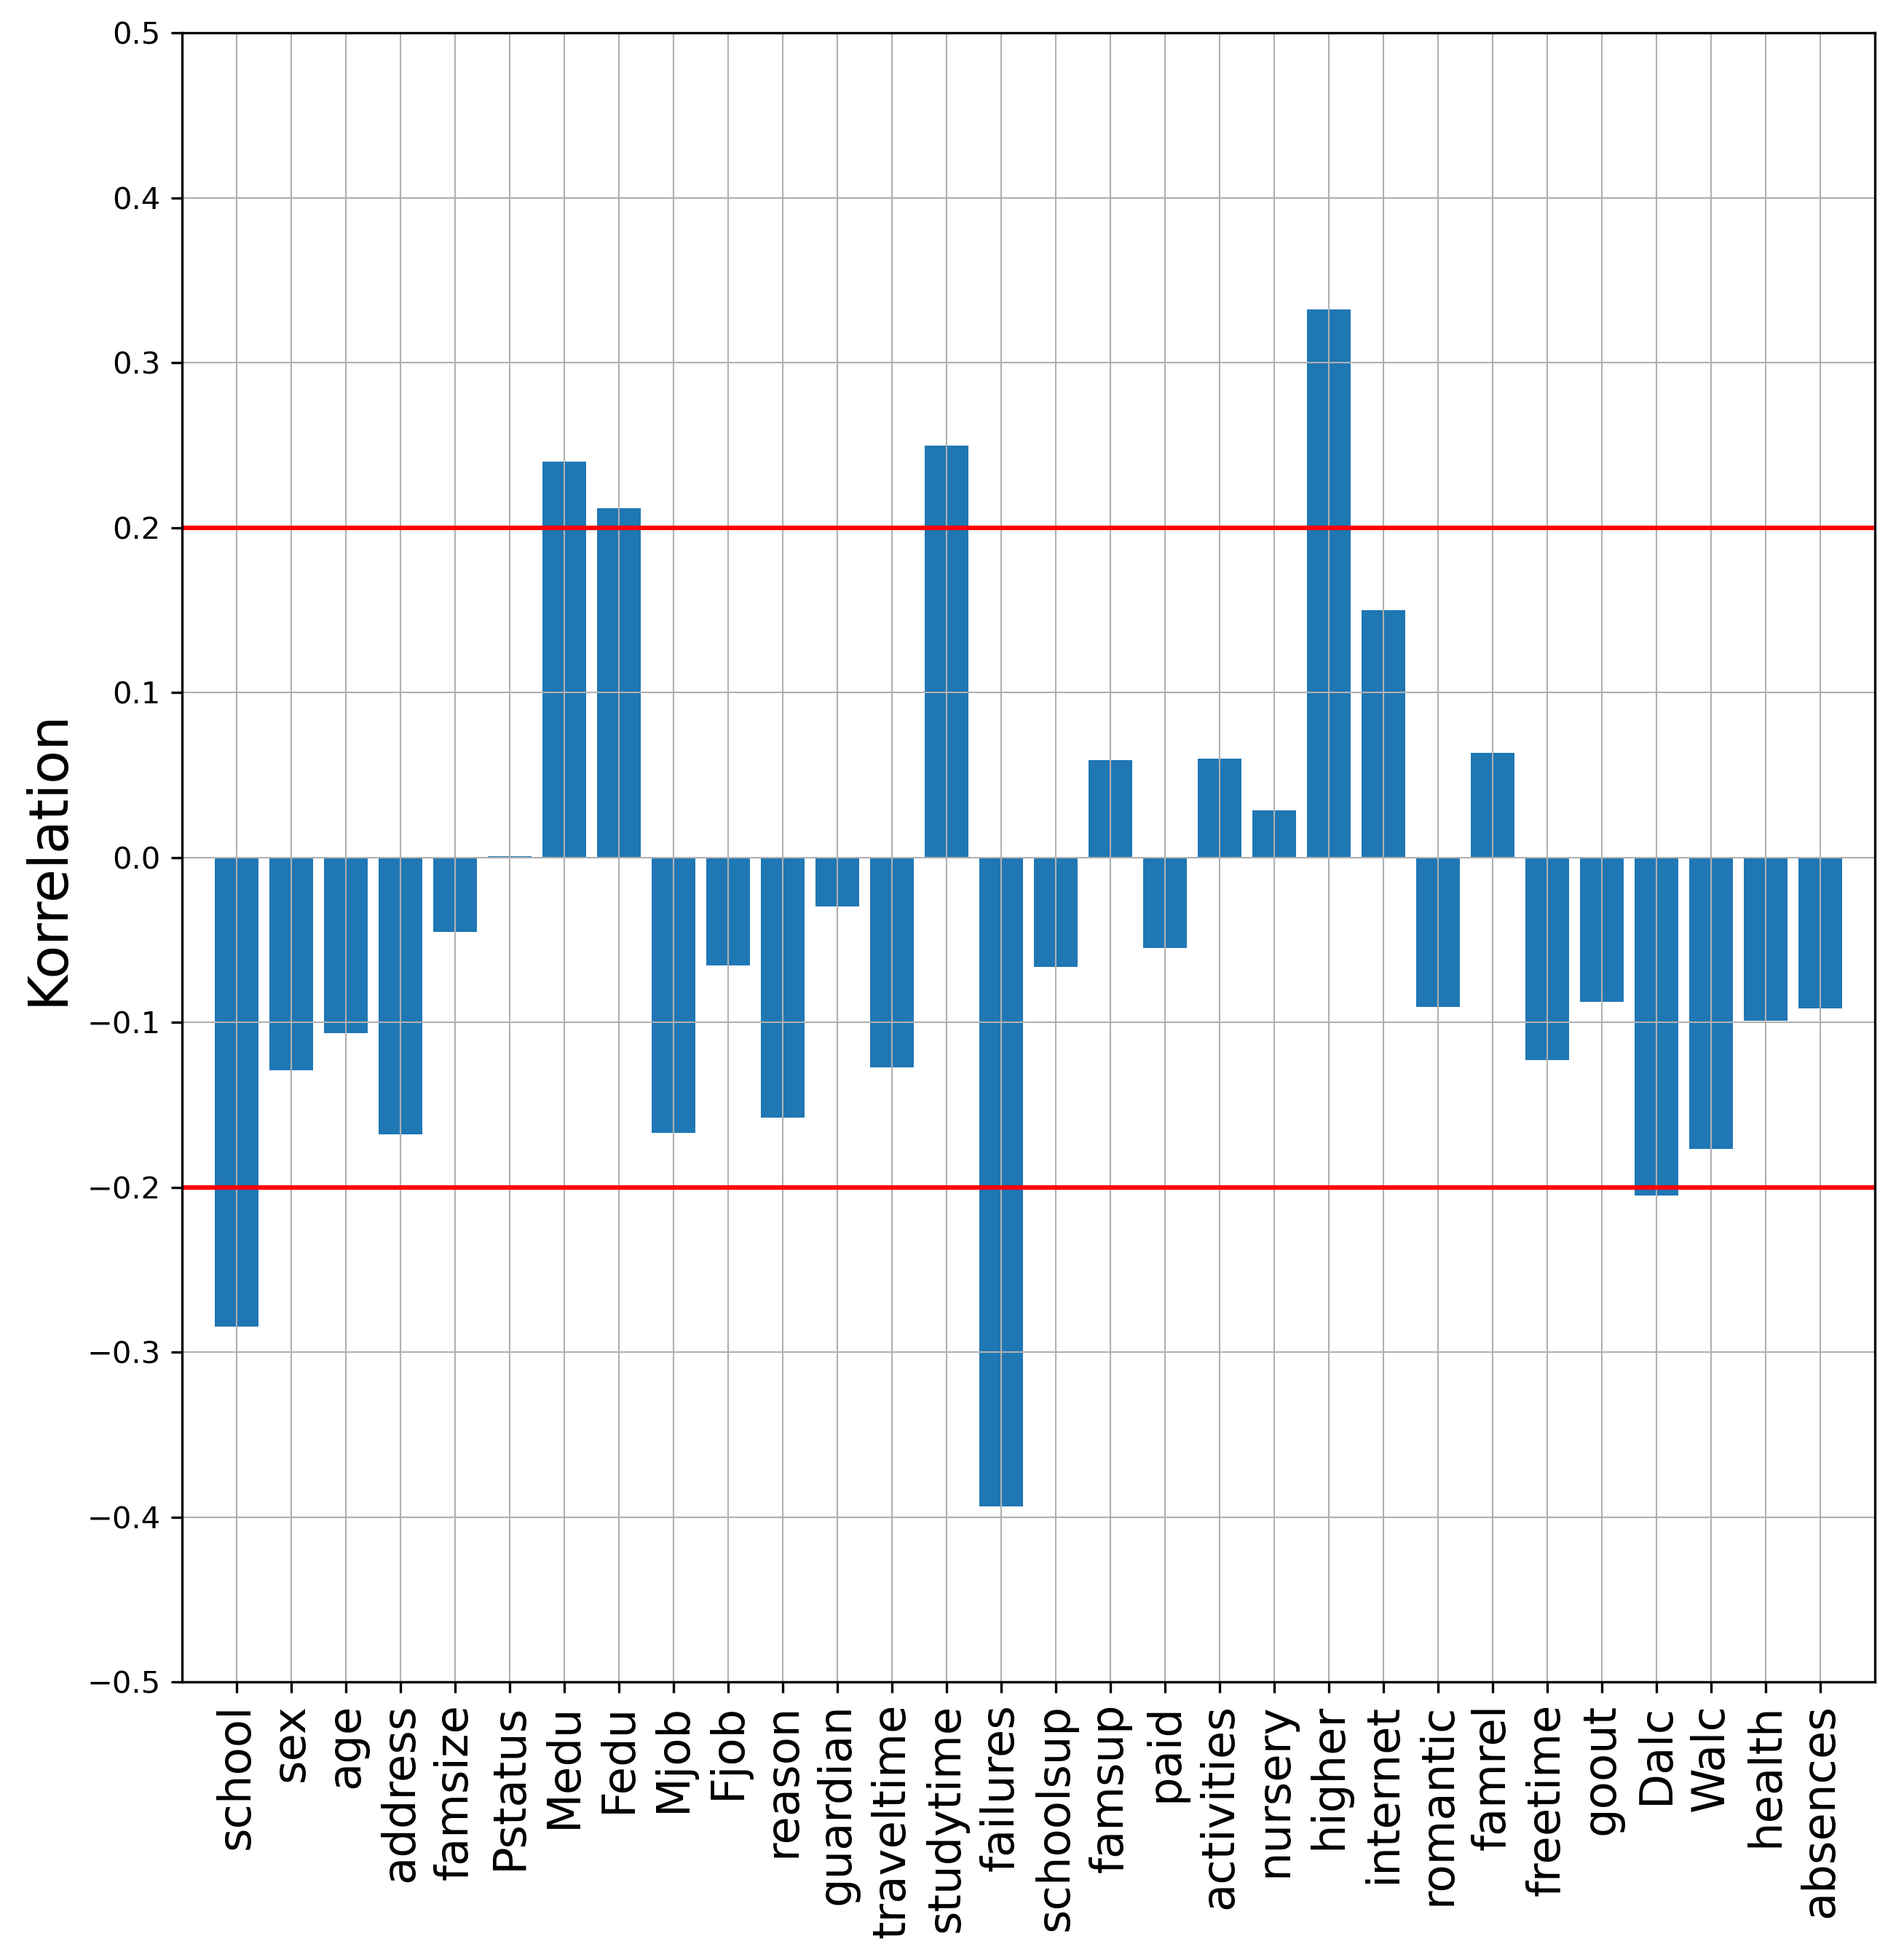

In [5]:
def show_correlation(df, col):
    
    #berechne Korrelation zu col
    corr = df.corr()[col]
    
    # col entfernen für darstellung
    corr = corr.drop(col)
    
    # plot
    plt.figure(dpi=300, figsize=(10,10))
    plt.grid(linewidth = 0.5)
    
    #Grenze ziehen für Attribute die mit reingenommen werden
    plt.plot([-1,len(corr.index)], [0.2,0.2], 'r')
    plt.plot([-1,len(corr.index)], [-0.2,-0.2], 'r')
    
    plt.bar(corr.index , corr)
    
    plt.ylabel("Korrelation", fontsize = 18)
    plt.xlim([-1,len(corr.index)])
    
    plt.xticks(np.arange(0, len(corr.index), 1), corr.index, rotation=90, fontsize = 15)
    plt.yticks(np.arange(-0.5,0.6,0.1))
    plt.show()
    
show_correlation(df_studierende, 'G3')

### Rausschmeißen aller Attribute, deren Korrelation unter 0.2 bzw. über -0.2 liegt

In [9]:
def drop(df_studierende):
    #Löschen aller Attribute, deren Korrelationswert unter 0.2 liegt
    drop_cols = ['sex','age', 'address','famsize','Pstatus','Mjob','Fjob','reason','guardian','traveltime','schoolsup','famsup','paid','activities','nursery','internet', 'romantic', 'famrel', 'freetime', 'goout','Walc', 'health', 'absences']

    for col in drop_cols:
        df_studierende = df_studierende.drop(columns = col)
    
    return df_studierende


### Dateframe mit allen Attributen in numerischen Werten

In [10]:
df_studierende = nom_to_num(studierende)
df_studierende.to_csv('df_studierende_complete.csv', sep =';', index = False)
df_studierende

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3
0,0,0,18,0,1,1,4,4,3,0,...,0,0,4,3,4,1,1,3,4,11
1,0,0,17,0,1,0,1,1,3,4,...,1,0,5,3,3,1,1,3,2,11
2,0,0,15,0,0,0,1,1,3,4,...,1,0,4,3,2,2,3,3,6,12
3,0,0,15,0,1,0,4,2,1,2,...,1,1,3,2,2,1,1,5,0,14
4,0,0,16,0,1,0,3,3,4,4,...,0,0,4,3,2,1,2,5,0,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,1,0,19,1,1,0,2,3,2,4,...,1,0,5,4,2,1,2,5,4,10
645,1,0,18,0,0,0,3,1,0,2,...,1,0,4,3,4,1,1,1,4,16
646,1,0,18,0,1,0,1,1,4,4,...,0,0,1,1,1,1,1,5,6,9
647,1,1,17,0,0,0,3,1,2,2,...,1,0,2,4,5,3,4,2,6,10


### Dataframe mit ausgewählten Attributen in numerischen Werten

In [8]:
df_studierende = drop(df_studierende)
df_studierende.to_csv('df_studierende.csv', sep =';', index = False)
df_studierende

,school,Medu,Fedu,studytime,failures,higher,Dalc,G3
0,0,4,4,2,0,1,1,11
1,0,1,1,2,0,1,1,11
2,0,1,1,2,0,1,2,12
3,0,4,2,3,0,1,1,14
4,0,3,3,2,0,1,1,13
...,...,...,...,...,...,...,...,...
644,1,2,3,3,1,1,1,10
645,1,3,1,2,0,1,1,16
646,1,1,1,2,0,1,1,9
647,1,3,1,1,0,1,3,10
